In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('Avaconda.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [57]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [58]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


In [60]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [61]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1517.0,2.699539e+01,1.484829e+01,0.00,14.00,29.00,39.00,51.00
AveragePrice,1517.0,1.074990e+00,1.888912e-01,0.49,0.98,1.08,1.19,1.68
Total Volume,1517.0,1.601879e+06,4.433143e+06,38750.74,147469.99,402791.86,981975.08,44655461.51
4046,1517.0,6.464387e+05,1.947614e+06,467.72,20400.34,81751.17,377578.48,18933038.04
4225,1517.0,6.114375e+05,1.672906e+06,1783.77,41476.06,118664.89,485150.34,18956479.74
4770,1517.0,5.040550e+04,1.377812e+05,0.00,911.25,7688.17,29167.30,1381516.11
Total Bags,1517.0,2.935974e+05,7.579765e+05,3311.77,36206.89,73979.06,157609.68,6736304.04
Small Bags,1517.0,2.487736e+05,6.474765e+05,3311.77,29727.22,62375.69,146199.35,5893641.72
Large Bags,1517.0,4.264205e+04,1.182157e+05,0.00,540.74,5044.35,29267.67,1121076.47
XLarge Bags,1517.0,2.181771e+03,7.455712e+03,0.00,0.00,0.00,401.48,108072.79


In [62]:
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.075531,0.091934,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,-0.012854
AveragePrice,-0.075531,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,0.091934,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,0.092013,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,0.093566,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,0.075647,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,0.081007,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,0.083485,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,0.065364,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.050993,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342


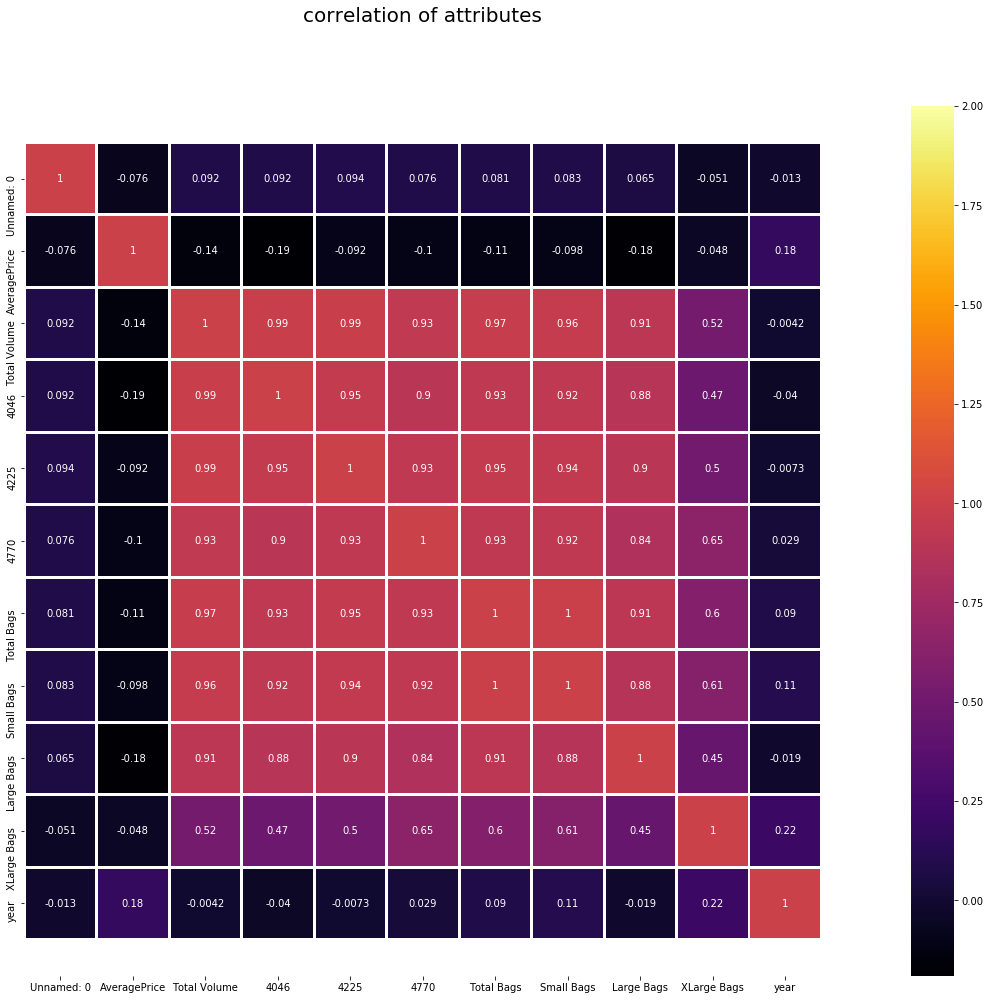

In [63]:
# Heat map represents of correlation between the various attributes
colormap=plt.cm.inferno # color range to be used in heat map
plt.figure(figsize=(32,16))
plt.title('correlation of attributes',y=1.09, size=20)
sns.heatmap(df.corr(),linewidths=2,vmax=2,square=True,cmap=colormap,linecolor='white',annot=True)

# snippet to overcome the top and bottom row breaking cells(matplotlib version specfic issue)
b,t = plt.ylim()# discover the values for button and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # subtract 0.5 from the top
plt.ylim(b,t)# update the ylim(bottom,top)values
plt.show()


In [64]:
df.drop(columns=['Unnamed: 0','Date'],axis=1,inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [65]:
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])
df['type']

0       0
1       0
2       0
3       0
4       0
       ..
1512    0
1513    0
1514    0
1515    0
1516    0
Name: type, Length: 1517, dtype: int32

In [66]:
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['region']

0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1517, dtype: int32

In [67]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016,7


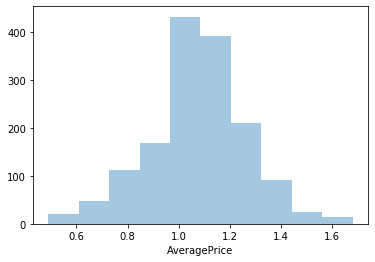

In [68]:
sns.distplot(df['AveragePrice'],kde=False,bins=10)

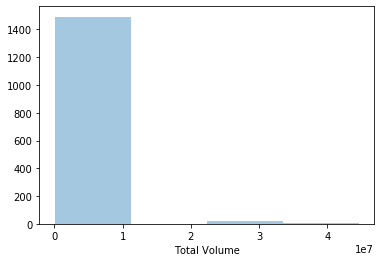

In [82]:
sns.distplot(df['Total Volume'],kde=False,bins=4)

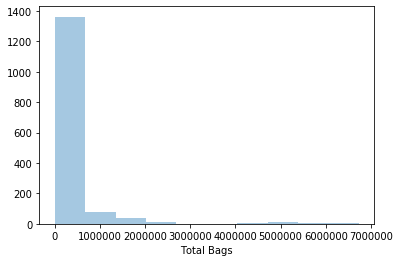

In [84]:
sns.distplot(df['Total Bags'],kde=False,bins=10)

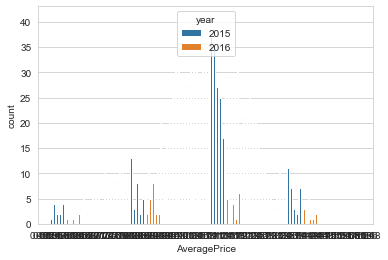

In [85]:
sns.set_style('whitegrid')
sns.countplot(x='AveragePrice',hue='year',data=df)

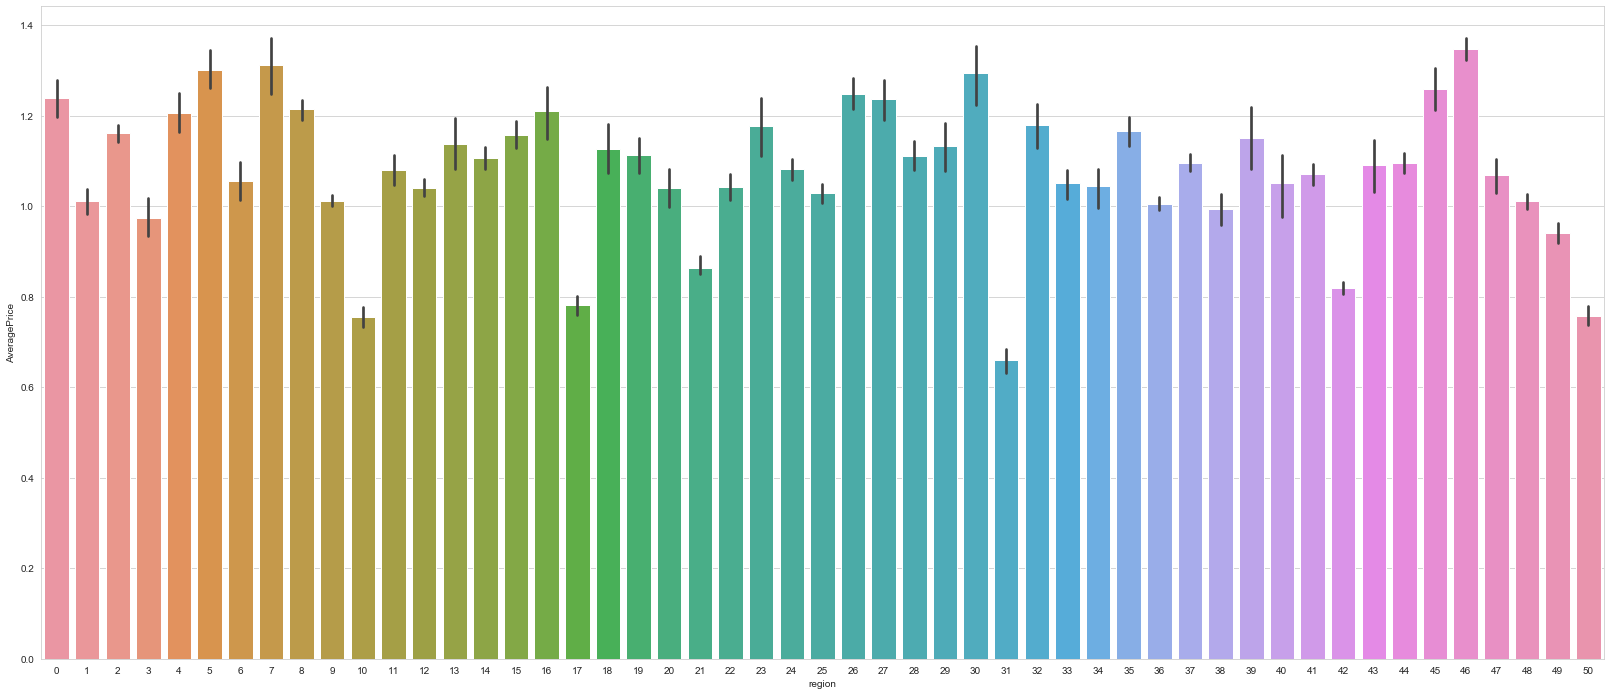

In [89]:
# Lets check the what is the comprehensive strength grouped by Region
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(28,12))
sns.barplot(x='region',y="AveragePrice",data=df)
plt.show()

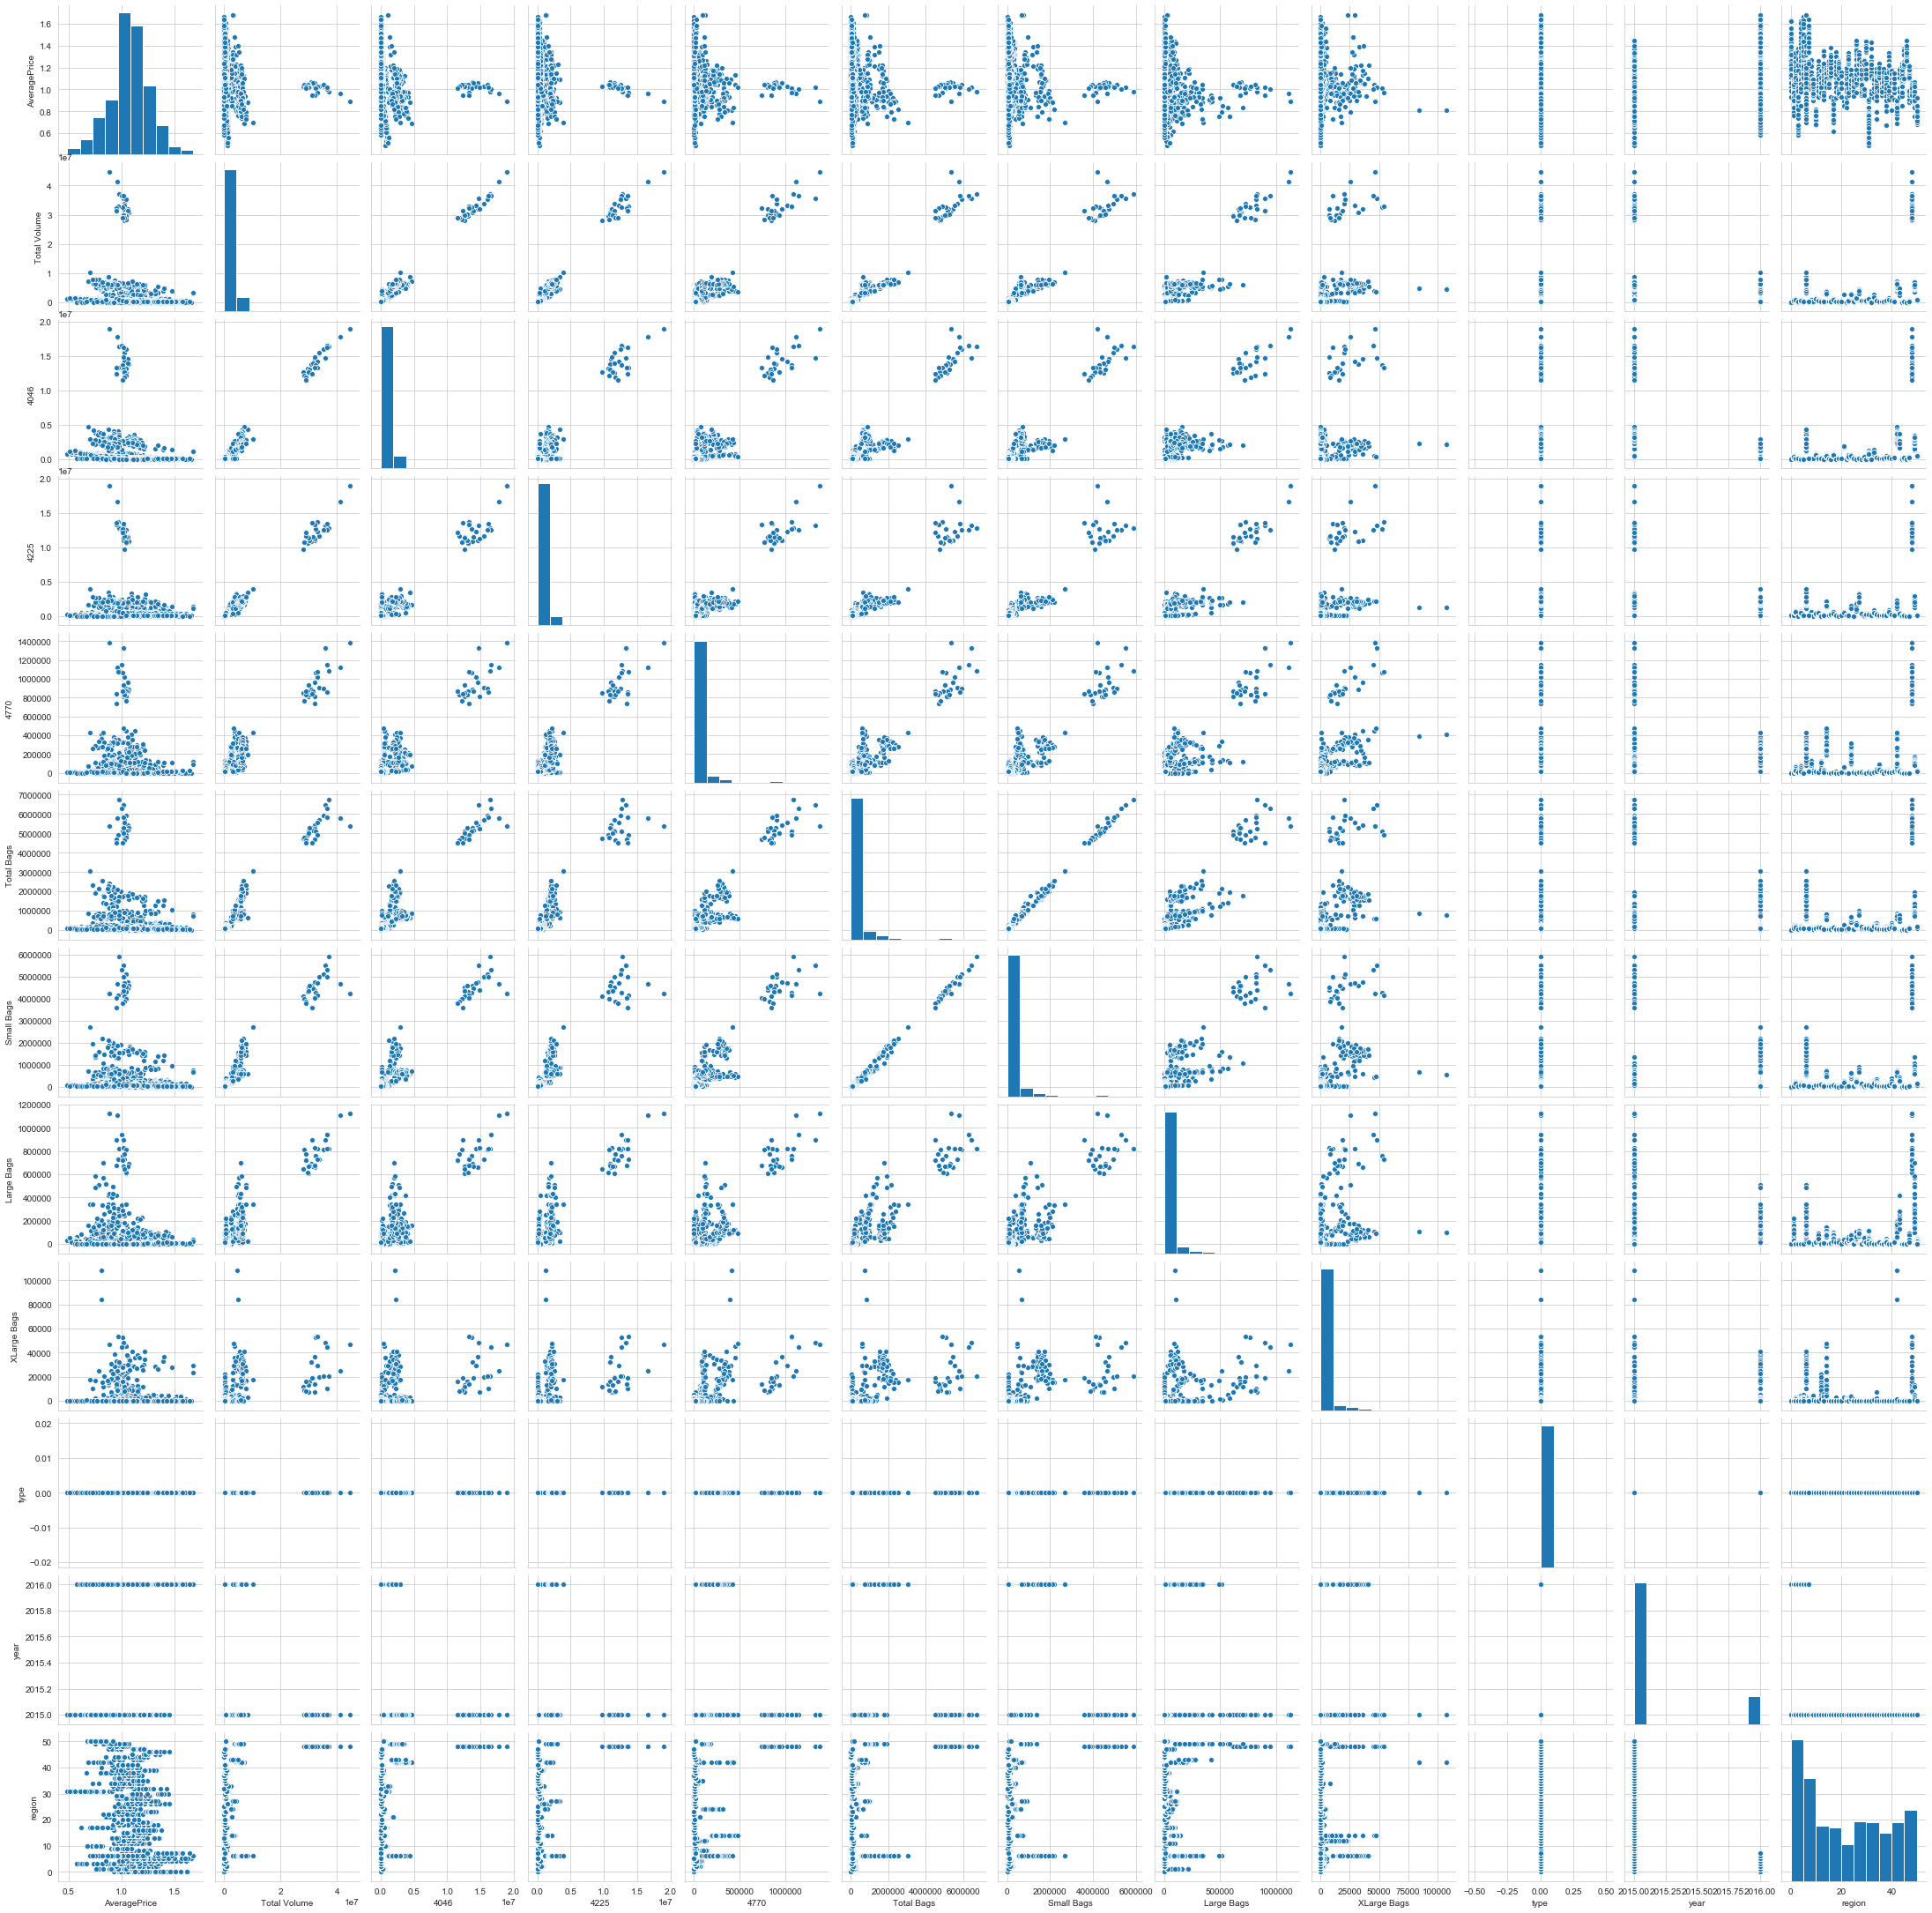

In [93]:
# Lets the check the Multi variant analysis of the Numerical Variables
import seaborn as sns
sns.pairplot(df)
plt.show()

In [92]:
#Independent variable

x=df[df.columns[0:60]].values 

#if we'll write .values it will give result in list and if not then it will give result in frame 

print(x)


[[1.3300000e+00 6.4236620e+04 1.0367400e+03 ... 0.0000000e+00
  2.0150000e+03 0.0000000e+00]
 [1.3500000e+00 5.4876980e+04 6.7428000e+02 ... 0.0000000e+00
  2.0150000e+03 0.0000000e+00]
 [9.3000000e-01 1.1822022e+05 7.9470000e+02 ... 0.0000000e+00
  2.0150000e+03 0.0000000e+00]
 ...
 [1.4800000e+00 1.7841082e+05 4.6364750e+04 ... 0.0000000e+00
  2.0160000e+03 7.0000000e+00]
 [1.4700000e+00 1.8913152e+05 5.4110790e+04 ... 0.0000000e+00
  2.0160000e+03 7.0000000e+00]
 [1.4300000e+00 1.8297830e+05 4.3116410e+04 ... 0.0000000e+00
  2.0160000e+03 7.0000000e+00]]


In [94]:
x.shape

(1517, 12)

In [97]:
#Dependent variable

y=df[df.columns[11]]

print(y.head()) 

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32


In [98]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=55,test_size=0.20)

In [99]:
#print the shape of the train and test data values

print(train_x.shape)

print(train_y.shape)

print(test_x.shape)

print(test_y.shape)

(1213, 12)
(1213,)
(304, 12)
(304,)


In [101]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.utils import shuffle
mnb=MultinomialNB()
mnb.fit(train_x,train_y)
mnb.score(train_x,train_y)
predmnb=mnb.predict(test_x)
print(accuracy_score(test_y,predmnb))
print(confusion_matrix(test_y,predmnb))
print(classification_report(test_y,predmnb))

0.7203947368421053
[[12  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  1]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  1  5  0]
 [ 0  0  0 ...  0  0  3]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      0.18      0.31        11
           2       1.00      1.00      1.00         9
           3       0.73      0.80      0.76        10
           4       0.20      0.11      0.14         9
           5       0.88      0.70      0.78        10
           6       1.00      0.56      0.71         9
           7       0.75      0.75      0.75         8
           8       1.00      1.00      1.00         8
           9       0.82      1.00      0.90         9
          10       0.33      1.00      0.50         3
          11       0.88      1.00      0.93         7
          12       1.00      0.67      0.80         9
          13       0.67      0.57      0.62         7
          14  

In [103]:
svc=SVC(kernel='rbf')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.17763157894736842
[[0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 9 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.50      0.09      0.15        11
           2       0.16      1.00      0.28         9
           3       0.06      1.00      0.11        10
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        10
           6       0.38      1.00      0.55         9
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00         7
          14       0.38      0.75      0.50      

In [105]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
predsvc=dtc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.9539473684210527
[[13  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         9
          10       0.67      0.67      0.67         3
          11       0.86      0.86      0.86         7
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         7
          14  

In [106]:
svc=KNeighborsClassifier()
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.8355263157894737
[[13  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0  8 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.64      0.64      0.64        11
           2       1.00      0.89      0.94         9
           3       1.00      1.00      1.00        10
           4       0.75      1.00      0.86         9
           5       0.90      0.90      0.90        10
           6       0.64      1.00      0.78         9
           7       0.89      1.00      0.94         8
           8       1.00      1.00      1.00         8
           9       1.00      0.89      0.94         9
          10       0.00      0.00      0.00         3
          11       0.88      1.00      0.93         7
          12       1.00      1.00      1.00         9
          13       0.50      0.14      0.22         7
          14  

In [107]:
svc=SVC(kernel='poly')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.09539473684210527
[[ 0  0 13 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  2  0]
 [ 0  0  3 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        11
           2       0.03      1.00      0.06         9
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        10
           6       0.45      1.00      0.62         9
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00         7
          14 

In [113]:
def svmkernel(ker):
    svc=SVC(kernel='poly')
    svc.fit(train_x,train_y)
    svc.score(train_x,train_y)
    predsvc=svc.predict(test_x)
    print(accuracy_score(test_y,predsvc))
    print(confusion_matrix(test_y,predsvc))
    print(classification_report(test_y,predsvc))

In [114]:
svmkernel('rbf')

0.09539473684210527
[[ 0  0 13 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  2  0]
 [ 0  0  3 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        11
           2       0.03      1.00      0.06         9
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        10
           6       0.45      1.00      0.62         9
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00         7
          14 

In [115]:
svmkernel('poly')

0.09539473684210527
[[ 0  0 13 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  2  0]
 [ 0  0  3 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        11
           2       0.03      1.00      0.06         9
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        10
           6       0.45      1.00      0.62         9
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00         7
          14 

In [116]:
df1=pd.DataFrame(predsvc)
df1.to_csv('svc_predicition.csv')

In [117]:
from sklearn.model_selection import cross_val_score
mnb=MultinomialNB()

score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.55921053 0.64144737 0.70627063 0.77557756 0.62706271]
0.6619137571651901
0.07357773292972324


In [118]:
sv=SVC()
score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.55921053 0.64144737 0.70627063 0.77557756 0.62706271]
0.6619137571651901
0.07357773292972324


# Cross validation

In [121]:
from sklearn import svm,datasets
from sklearn.model_selection import GridSearchCV
iris=datasets.load_iris()
parameters={'kernel':('linear','rbf'),'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(iris.data,iris.target)

print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.9800000000000001
linear
{'C': 1, 'kernel': 'linear'}


In [122]:
from sklearn import svm,datasets
from sklearn.model_selection import GridSearchCV
iris=datasets.load_iris()
parameters={'kernel':('linear','rbf'),'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(iris.data,iris.target)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [123]:
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [125]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),MultinomialNB()]


for m in model:
    m.fit(train_x,train_y)
    predm=m.predict(test_x)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(test_y,predm))
    print(confusion_matrix(test_y,predm))
    print(classification_report(test_y,predm))
    print('\n')

Accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
0.9671052631578947
[[13  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        

In [127]:
from sklearn.externals import joblib

# save the model as a object file

joblib.dump(dtc,'dtcfile.obj')
# load the model from the file

dtc_from_joblib=joblib.load('dtcfile.obj')

#use the loaded model to make predication

dtc_from_joblib.predict(test_x)

array([38, 44, 12,  5, 12, 36, 37, 48, 45, 26,  1,  9, 41, 12, 35, 17, 18,
       41, 19, 36, 27, 44,  8, 11, 36,  2, 19, 31, 44, 10,  3,  5, 19, 35,
        7,  5,  6,  0,  1,  4, 48, 46,  0, 26,  0, 30,  5, 44,  0,  0, 42,
       32, 49,  7, 10,  8, 28,  8, 11, 47, 18, 24, 13, 24, 50, 38, 44, 47,
       49,  8,  1, 24, 26, 28,  9,  0, 17,  6,  7, 17,  2, 26, 34, 25, 18,
        0, 44, 11,  9, 13, 44, 46, 49, 35,  6, 17, 12, 44,  8, 26,  1, 12,
        2,  1, 30, 31, 31, 38, 19,  7, 31, 37, 29, 25,  4,  6,  9, 38, 19,
       46,  0, 42,  3,  9, 28, 19, 28,  0, 31,  4,  1, 13, 16, 42, 22, 37,
       35, 31, 17, 26,  8, 49, 14, 12,  5,  2, 47,  5,  3, 37, 27, 35, 31,
        4, 47,  2, 28, 41, 26, 22, 24, 15, 18,  1,  6, 32, 47,  5, 47, 17,
       42, 11, 31, 35,  6, 49, 47, 24,  2,  4,  5, 37,  3,  1, 42, 26,  6,
       46, 48, 22,  0,  5, 14, 17, 13, 13, 15, 19, 19,  3,  7,  3, 12, 44,
        2,  2,  7,  5, 29, 20, 23, 50,  7, 31, 10, 34, 49,  0,  9, 11, 32,
        6, 19, 17, 28, 49

In [129]:
import pickle
filename='pickledtcfile.pkl'
pickle.dump(dtc,open(filename,'wb'))
# Load the model from the disk
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(test_x)

array([38, 44, 12,  5, 12, 36, 37, 48, 45, 26,  1,  9, 41, 12, 35, 17, 18,
       41, 19, 36, 27, 44,  8, 11, 36,  2, 19, 31, 44, 10,  3,  5, 19, 35,
        7,  5,  6,  0,  1,  4, 48, 46,  0, 26,  0, 30,  5, 44,  0,  0, 42,
       32, 49,  7, 10,  8, 28,  8, 11, 47, 18, 24, 13, 24, 50, 38, 44, 47,
       49,  8,  1, 24, 26, 28,  9,  0, 17,  6,  7, 17,  2, 26, 34, 25, 18,
        0, 44, 11,  9, 13, 44, 46, 49, 35,  6, 17, 12, 44,  8, 26,  1, 12,
        2,  1, 30, 31, 31, 38, 19,  7, 31, 37, 29, 25,  4,  6,  9, 38, 19,
       46,  0, 42,  3,  9, 28, 19, 28,  0, 31,  4,  1, 13, 16, 42, 22, 37,
       35, 31, 17, 26,  8, 49, 14, 12,  5,  2, 47,  5,  3, 37, 27, 35, 31,
        4, 47,  2, 28, 41, 26, 22, 24, 15, 18,  1,  6, 32, 47,  5, 47, 17,
       42, 11, 31, 35,  6, 49, 47, 24,  2,  4,  5, 37,  3,  1, 42, 26,  6,
       46, 48, 22,  0,  5, 14, 17, 13, 13, 15, 19, 19,  3,  7,  3, 12, 44,
        2,  2,  7,  5, 29, 20, 23, 50,  7, 31, 10, 34, 49,  0,  9, 11, 32,
        6, 19, 17, 28, 49

In [130]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [132]:
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
lr.coef_

array([ 2.74563827e-14,  2.69581827e-13, -2.69581951e-13, -2.69581987e-13,
       -2.69580112e-13, -2.91527924e-13,  2.19462281e-14,  2.19458251e-14,
        2.19203517e-14,  0.00000000e+00,  8.63404460e-15,  1.00000000e+00])

In [134]:
lr.intercept_

-1.731237375679484e-11

In [136]:
lr.score(train_x,train_y)

1.0

In [138]:
pred=lr.predict(test_x)
print("Predicted value and actual of fare",pred,test_y) 

Predicted value and actual of fare [3.80000000e+01 4.40000000e+01 1.20000000e+01 5.00000000e+00
 1.20000000e+01 3.60000000e+01 3.70000000e+01 4.80000000e+01
 4.50000000e+01 2.60000000e+01 1.00000000e+00 9.00000000e+00
 4.10000000e+01 1.20000000e+01 3.50000000e+01 1.70000000e+01
 1.80000000e+01 4.10000000e+01 1.90000000e+01 3.40000000e+01
 4.20000000e+01 4.40000000e+01 8.00000000e+00 1.10000000e+01
 3.60000000e+01 2.00000000e+00 1.90000000e+01 3.10000000e+01
 4.40000000e+01 1.00000000e+01 3.00000000e+00 5.00000000e+00
 1.90000000e+01 3.50000000e+01 7.00000000e+00 5.00000000e+00
 6.00000000e+00 1.27465555e-13 1.00000000e+00 4.00000000e+00
 4.80000000e+01 4.60000000e+01 1.26691128e-13 2.60000000e+01
 1.14962822e-13 3.00000000e+01 5.00000000e+00 4.50000000e+01
 1.07438775e-13 1.32638003e-13 2.70000000e+01 3.20000000e+01
 4.90000000e+01 7.00000000e+00 1.10000000e+01 8.00000000e+00
 2.80000000e+01 8.00000000e+00 1.10000000e+01 4.70000000e+01
 1.80000000e+01 2.40000000e+01 1.30000000e+01 2.40

In [144]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 42 is 1.0
